In [60]:
import numpy as np
import models
from maneuvers import Maneuvers
from datetime import datetime
from constants import constants
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [64]:
# Initial Conditions
rp = 384000e3
ra = 384001e3
Omega = 125.08*np.pi/180
i = 6.688*np.pi/180
omega = 0*np.pi/180
nu = 90*np.pi/180
a = (rp+ra)/2
e = ra/a-1
coe = [a,e,i,omega,Omega,nu]

startDate = datetime.now()

# Spacecraft
wetMass = 3
propMass = 2.9
area = 10
satellite = models.Spacecraft(wetMass,wetMass-propMass,area)

# Thruster
thrust = 1e-3
isp = 720
satellite.thruster = models.Thruster(thrust=thrust,isp=isp)

# Maneuvers
maneuver = Maneuvers(coe,satellite,startDate,formulation="betts")
maneuver.propagate(60*60*24*30*5,60*60);

Propagating...from day  0.0  to  150.0


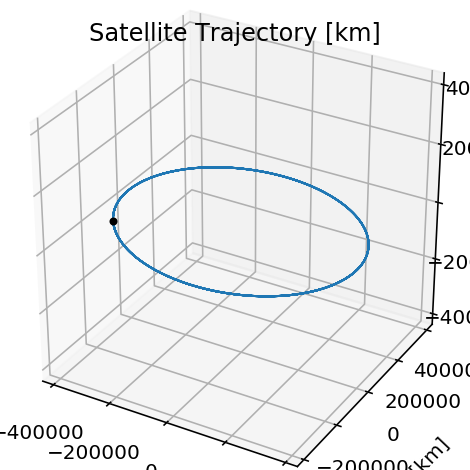

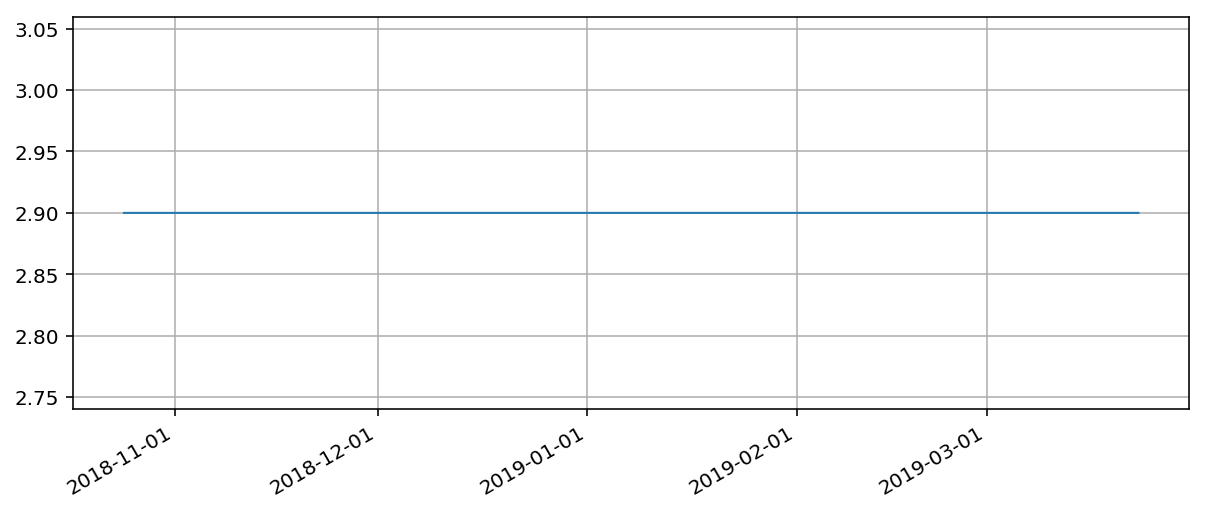

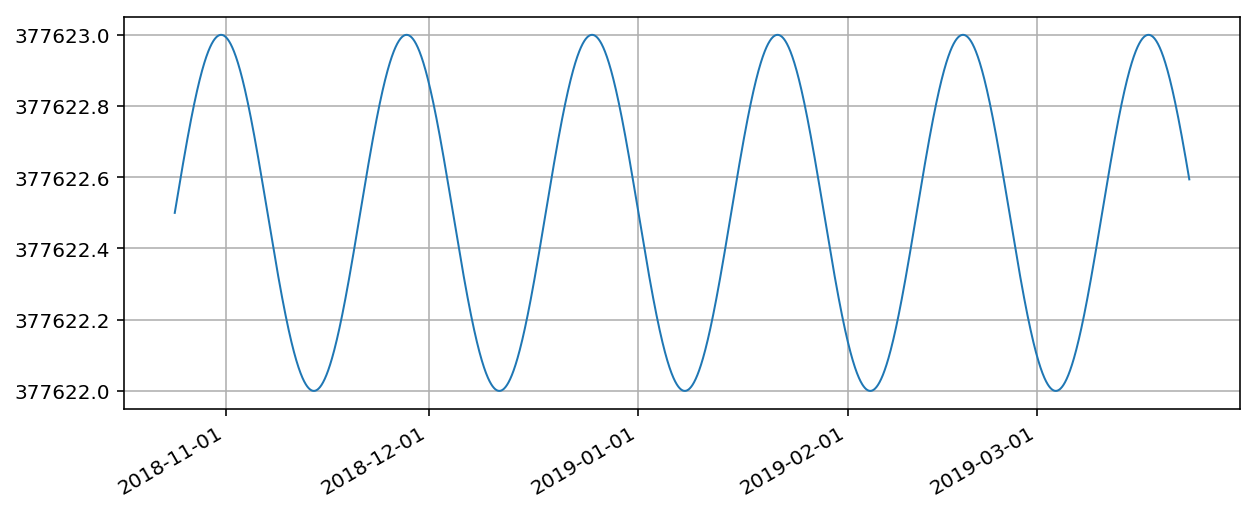

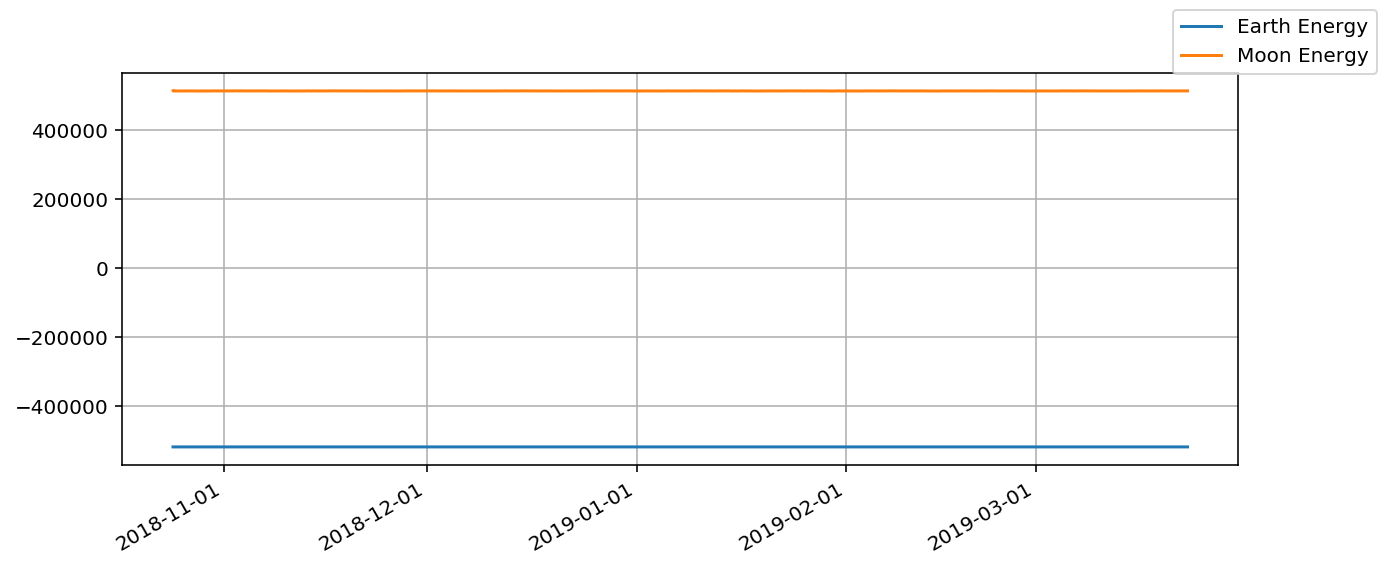

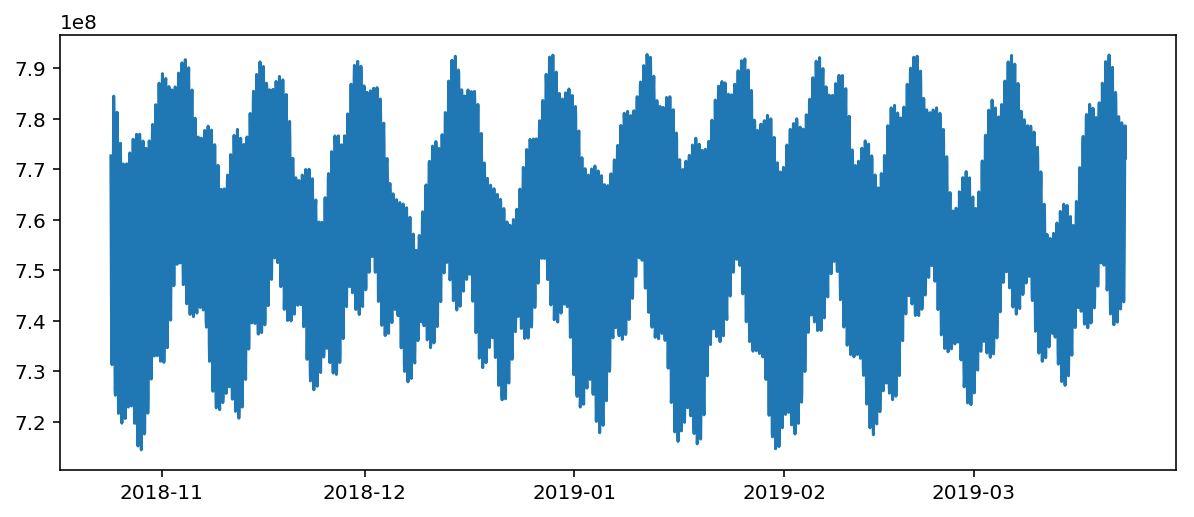

In [65]:
maneuver.plot("3d-trajectory")
maneuver.plot("singleItem",maneuver.history.propMass)
maneuver.plot("singleItem",(np.linalg.norm(maneuver.history.r,axis=1)-constants.Re)/1e3)
maneuver.plot('energy')